In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def split_data_by_bands(filename):
    bands = []
    current_band_data = []

    with open(filename, 'r') as file:
        next(file)

        for line in file:
            if line.strip():  # Check if the line is not empty
                data = line.split()
                current_band_data.append([float(val) for val in data])
            else:
                bands.append(current_band_data)
                current_band_data = []

        if current_band_data:
            bands.append(current_band_data)

    return bands

def filter_by_k_value(df, column_name, value):
    """
    Filter the DataFrame `df` for rows where `column_name` matches `value`.

    Parameters:
        df (pd.DataFrame): The DataFrame to filter (e.g., cb1 or cb2).
        column_name (str): The name of the column to filter by ('kx' or 'ky').
        value (float): The value to filter for in the specified column.

    Returns:
        pd.DataFrame: A DataFrame containing only the rows where the column value matches the input.
    """
    if column_name not in ['kx', 'ky']:
        raise ValueError("Column name must be 'kx' or 'ky'")

    filtered_df = df[df[column_name] == value]
    return filtered_df


(-1.5, 1.5)

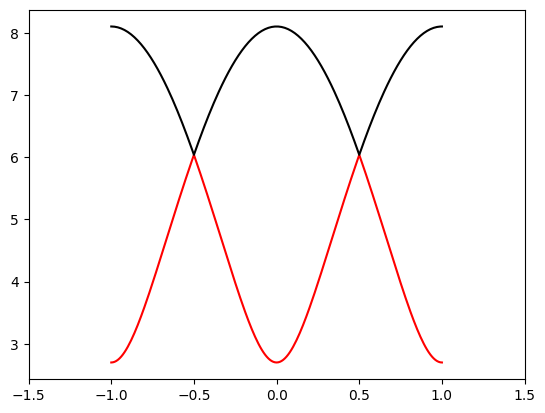

In [7]:
filename = "dense/bulkek.dat"
bands = split_data_by_bands(filename)
cb1 = bands[2]
cb2 = bands[3]

columns = ['kx', 'ky', 'kz', 'energy']
cb1_df = pd.DataFrame(cb1, columns=columns)
cb2_df = pd.DataFrame(cb2, columns=columns)
spurious_shift = 0
ky_value = 0.0
cb1_filtered = filter_by_k_value(cb1_df, 'ky', ky_value)
cb2_filtered = filter_by_k_value(cb2_df, 'ky', ky_value)
plt.plot(cb1_filtered['kx'],cb1_filtered['energy']+spurious_shift,c='red')
plt.plot(cb2_filtered['kx'],cb2_filtered['energy']-spurious_shift,c='black')
plt.xlim(-1.5,1.5)
